# Cohere Command R with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Cohere Command R with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import cohere_instructions_v213
MODEL_ID = "cohere.command-r-v1:0"
SYSTEM_PROMPT = cohere_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 12
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 21
INFO:root:Completed: 20
INFO:root:Completed: 19
INFO:root:Completed: 22
INFO:root:Completed: 26
INFO:root:Completed: 23
INFO:root:Completed: 25
INFO:root:Completed: 24
INFO:root:Completed: 18
INFO:root:Completed: 30
INFO:root:Completed: 27
INFO:root:Completed: 28


CPU times: user 1min 10s, sys: 5.04 s, total: 1min 15s
Wall time: 11min 56s


[{'0005.91306_cites_88693.txt': {'model': 'cohere.command-r-v1:0',
   'input_tokens': 2343,
   'output_tokens': 72,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'The passage does not contain any Explicit or Implicit Negative Actions towards the Target Case. The Acting Case only cited and rehearsed the propositions within the Target Case, indicating no intention to overrule it.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.999,\n  "rationale": "The passage does not contain any Explicit or Implicit Negative Actions towards the Target Case. The Acting Case only cited and rehearsed the propositions within the Target Case, indicating no intention to overrule it."\n}\n```'}},
 {'0004.91306_cites_88240.txt': {'model': 'cohere.command-r-v1:0',
   'input_tokens': 2340,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 1.0,
   'rationale': "The Acting Case confirms the satisfaction and validity of the Target Case's grounds, indicating a 

In [19]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0005.91306_cites_88693.txt,cohere.command-r-v1:0,2343.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0004.91306_cites_88240.txt,cohere.command-r-v1:0,2340.0,71.0,no,1.000,The Acting Case confirms the satisfaction and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,cohere.command-r-v1:0,2381.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0002.91306_cites_88994.txt,cohere.command-r-v1:0,2862.0,78.0,no,0.990,The passage only discusses and explains the Ta...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0001.91306_cites_88061.txt,cohere.command-r-v1:0,3143.0,96.0,no,0.900,The Acting Case cited the Target Case to quest...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [20]:
prediction_df.to_csv("predictions/2.cohere/0.commandR_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [21]:
prediction_df["prediction"].isna().sum()

48

In [22]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/2.cohere/0.commandR_v213_prompt.csv")

In [23]:
prediction_df["prediction"].isna().sum()

42

## Even after manually review and clean, there are still some missing, so call the model again

In [24]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

42

In [25]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 87
INFO:root:Completed: 82
INFO:root:Completed: 204
INFO:root:Completed: 69
INFO:root:Completed: 40
INFO:root:Completed: 267
INFO:root:Completed: 256
INFO:root:Completed: 263
INFO:root:Completed: 293
INFO:root:Completed: 324
INFO:root:Completed: 361
INFO:root:Completed: 359
INFO:root:Completed: 415
INFO:root:Completed: 429
INFO:root:Completed: 444
INFO:root:Completed: 470
INFO:root:Completed: 563
INFO:root:Completed: 569
INFO:root:Completed: 576
INFO:root:Completed: 680
INFO:root:Completed: 601
INFO:root:Completed: 699
INFO:root:Completed: 768
INFO:root:Completed: 707
INFO:root:Completed: 797
INFO:root:Completed: 705
INFO:root:Completed: 817
INFO:root:Completed: 810
INFO:root:Completed: 868
INFO:root:Completed: 823
INFO:root:Completed: 818
INFO:root:Completed: 923
INFO:root:Completed: 1009
INFO:root:Completed: 966
INFO:root:Completed: 1015
INFO:root:Completed: 980
INFO:root:Completed: 1025
INFO:root:Completed: 1023
INFO:root:Completed: 1058
INFO:root:Completed: 106

CPU times: user 2.77 s, sys: 145 ms, total: 2.92 s
Wall time: 16 s


[{'0093.101913_cites_101648.txt': {'model': 'cohere.command-r-v1:0',
   'input_tokens': 2409,
   'output_tokens': 65,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'The Acting Case only cited the Target Case as part of its legal reasoning without taking any Explicit or Implicit Negative Actions. Hence the Target Case is not overruled.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.999,\n  "rationale": "The Acting Case only cited the Target Case as part of its legal reasoning without taking any Explicit or Implicit Negative Actions. Hence the Target Case is not overruled."\n}\n```'}},
 {'0087.101913_cites_101632.txt': {'model': 'cohere.command-r-v1:0',
   'input_tokens': 2396,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'The passage does not contain any Explicit or Implicit Negative Actions towards the Target Case. The Acting Case only cites the Target Case as a reference without any negative commentar

In [26]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0093.101913_cites_101648.txt,cohere.command-r-v1:0,2409,65,no,0.999,The Acting Case only cited the Target Case as ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0087.101913_cites_101632.txt,cohere.command-r-v1:0,2396,71,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0208.103522_cites_103227.txt,cohere.command-r-v1:0,2513,79,no,0.999,The passage only cites the Target Case as part...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0037.98917_cites_96878.txt,cohere.command-r-v1:0,2930,94,no,0.999,"The Acting Case cites the Target Case twice, o...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0046.98917_cites_96107.txt,cohere.command-r-v1:0,2378,112,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [27]:
retry_df["prediction"].isna().sum()

0

## Combine predictions & retrys

In [29]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [32]:
prediction_df = comb_prediction_df

In [33]:
len(prediction_df)

1084

In [34]:
prediction_df["prediction"].isna().sum()

0

In [35]:
prediction_df.to_csv("predictions/2.cohere/0.commandR_v213_prompt.csv", index=False)

# Combine the prediction results with label for evaluation

In [36]:
assert len(df) == len(prediction_df)

In [37]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,cohere.command-r-v1:0,3143.0,96.0,no,0.900,The Acting Case cited the Target Case to quest...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,cohere.command-r-v1:0,2862.0,78.0,no,0.990,The passage only discusses and explains the Ta...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,cohere.command-r-v1:0,2381.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,cohere.command-r-v1:0,2340.0,71.0,no,1.000,The Acting Case confirms the satisfaction and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,cohere.command-r-v1:0,2343.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [38]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [39]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [40]:
eval_df["prediction"].value_counts()

prediction
no     687
yes    397
Name: count, dtype: int64

In [41]:
eval_df["input_tokens"].sum()

3871119.0

In [42]:
eval_df["output_tokens"].sum()

93241.0

In [43]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [44]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.95      0.70      0.80       935
         Yes       0.28      0.75      0.41       149

    accuracy                           0.70      1084
   macro avg       0.61      0.72      0.61      1084
weighted avg       0.85      0.70      0.75      1084



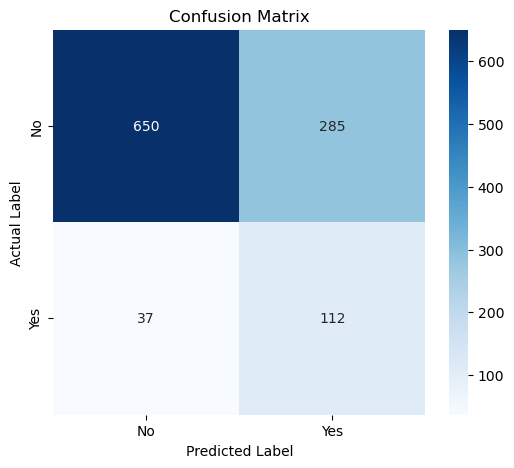

In [45]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [46]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.70
Precision: 0.28
Recall: 0.75
F-score: 0.41
Specificity: 0.70
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 112
True negatives: 650
False positives: 285
False negatives: 37


In [47]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

285

In [48]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

37

# Save the evaluation df

In [49]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,cohere.command-r-v1:0,3143.0,96.0,no,0.900,The Acting Case cited the Target Case to quest...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,cohere.command-r-v1:0,2862.0,78.0,no,0.990,The passage only discusses and explains the Ta...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,cohere.command-r-v1:0,2381.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,cohere.command-r-v1:0,2340.0,71.0,no,1.000,The Acting Case confirms the satisfaction and ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,cohere.command-r-v1:0,2343.0,72.0,no,0.999,The passage does not contain any Explicit or I...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [50]:
eval_df.to_csv("predictions/2.cohere/0.commandR_v213_prompt_eval.csv", index=False)